<a href="https://colab.research.google.com/github/DarknessSpectre/Labs/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Классификация цветов Ириса

##ВНИМАНИЕ!
Данное задание представляет собой содержит пустые ячейки кода, которые нужно заполнить. Для этого пользуйтесь подсказками-инструкциями в тексте этого документа и своими знаниями о загрузке данных из файла, предобработке данных, разделении данных на признаки и целевую переменную, обучении моделей регрессии и оценке модели на тестовых данных.

Для выполнения задания сохраните копию файла себе на Google Диск, выполните задания, а потом поделитесь ссылкой на файл в качестве результата. Не забудьте открыть доступ, чтобы можно было проверить правильность выполнения.

###1. Загрузка библиотек
Загрузите библиотеки NumPy, Pandas, Matplotlib и Scikit-learn.

In [1]:
pip install numpy pandas matplotlib scikit-learn

###2. Загрузка данных
####2.1 Загрузите датасет Ирисов Фишера из библиотеки Scikit-learn.

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

####2.2 Преобразуйте датасет в pandas DataFrame для удобства работы с данными.

In [18]:
import pandas as pd
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


####2.3 Разделите данные на обучающую и тестовую выборки.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

###3. Анализ данных
####3.1 Выведите первые несколько строк датасета, чтобы посмотреть на данные.

In [8]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


####3.2 Выведите общую информацию о датасете, такую как количество записей и признаков, названия столбцов и типы данных.

In [9]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


####3.3 Используйте метод describe() для получения статистической информации о каждом признаке.

In [10]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


####3.4 Визуализируйте данные с помощью диаграмм рассеяния, чтобы увидеть взаимосвязи между признаками.

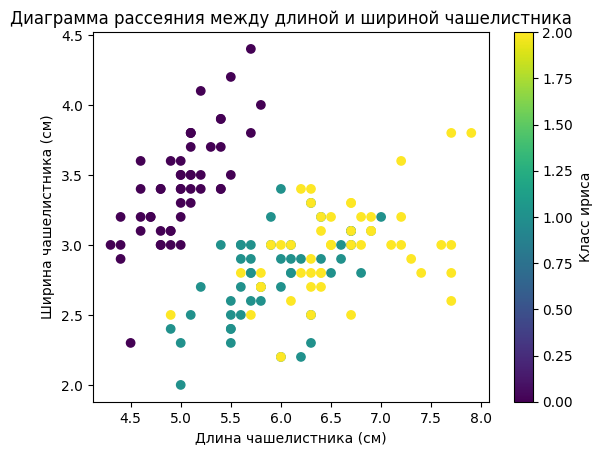

In [22]:
import matplotlib.pyplot as plt
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c=iris_df['target'], cmap='viridis')
plt.xlabel('Длина чашелистника (см)')
plt.ylabel('Ширина чашелистника (см)')
plt.title('Диаграмма рассеяния между длиной и шириной чашелистника')
plt.colorbar(label='Класс ириса')
plt.show()

###4. Предобработка данных
#### 4.1 Масштабируйте признаки с помощью метода StandardScaler() из библиотеки Scikit-learn.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###5. Обучение модели
####5.1 Создайте объект класса KNeighborsClassifier из библиотеки Scikit-learn.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

####5.2 Обучите модель на данных для обучения с помощью метода fit().


In [15]:
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

###6. Оценка модели
####6.1 Получите прогнозы для данных для обучения и тестирования с помощью метода predict().

In [16]:
y_train_pred = knn_classifier.predict(X_train_scaled)
y_test_pred = knn_classifier.predict(X_test_scaled)

####6.2 Оцените качество модели с помощью метрик точности, полноты и F-меры.

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Точность на обучающей выборке:", accuracy_score(y_train, y_train_pred))
print("Полнота на обучающей выборке:", recall_score(y_train, y_train_pred, average='macro'))
print("F-мера на обучающей выборке:", f1_score(y_train, y_train_pred, average='macro'))

print("Точность на тестовой выборке:", accuracy_score(y_test, y_test_pred))
print("Полнота на тестовой выборке:", recall_score(y_test, y_test_pred, average='macro'))
print("F-мера на тестовой выборке:", f1_score(y_test, y_test_pred, average='macro'))

Точность на обучающей выборке: 0.9523809523809523
Полнота на обучающей выборке: 0.954954954954955
F-мера на обучающей выборке: 0.9549467275494671
Точность на тестовой выборке: 1.0
Полнота на тестовой выборке: 1.0
F-мера на тестовой выборке: 1.0


####6.3 Визуализируйте матрицу ошибок (confusion matrix) и отчет классификации (classification report) с помощью функции confusion_matrix() и classification_report() из библиотеки Scikit-learn

In [26]:
confusion = confusion_matrix(y_test, y_test_pred)
print("Матрица ошибок:")
print(confusion)

report = classification_report(y_test, y_test_pred, target_names=iris.target_names)
print("Отчет классификации:")
print(report)

Матрица ошибок:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Отчет классификации:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

